In [26]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style

In [56]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re,random,os
import seaborn as sns
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
spacy.cli.download("en_core_web_sm")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [57]:
df=pd.read_csv("C:\\Users\\khan1\\Downloads\\Amazon Reviews.csv\\Amazon Reviews.csv", sep=",")
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [58]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [59]:
data = df.copy()
data.describe()

,ean,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince,sizes,upc
count,8.980000e+02,900.000000,1177.000000,0.0,0.0,0.0,8.980000e+02
mean,8.443135e+11,83.584444,4.359388,NaN,NaN,NaN,8.443135e+11
std,3.416444e+09,197.150238,1.021445,NaN,NaN,NaN,3.416444e+09
min,8.416670e+11,0.000000,1.000000,NaN,NaN,NaN,8.416670e+11
25%,8.416670e+11,0.000000,4.000000,NaN,NaN,NaN,8.416670e+11
50%,8.416670e+11,0.000000,5.000000,NaN,NaN,NaN,8.416670e+11
75%,8.487190e+11,34.000000,5.000000,NaN,NaN,NaN,8.487190e+11
max,8.487190e+11,997.000000,5.000000,NaN,NaN,NaN,8.487190e+11


In [76]:
# Builds histogram and set the number of bins and fig size (width, height)
#data.hist(column='reviews.rating',bins=50, figsize=(20,15))
#plt.show()
data.rename(
    columns={"reviews.text":"text", "reviews.rating":"rating"}
          ,inplace=True)

In [45]:
import operator

In [62]:
pip install gensim

You should consider upgrading via the 'C:\Users\khan1\anaconda3\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24


In [63]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk

#stemmer = SnowballStemmer('english')
#stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


In [66]:

def lemmatize(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize(token))
            #result.append(token)
    return " ".join(result)

In [68]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import warnings
warnings.filterwarnings("ignore")

In [73]:
processed_docs = data['text']
processed_docs[:100]

0     I initially had trouble deciding between the p...
1     Allow me to preface this with a little history...
2     I am enjoying it so far. Great for reading. Ha...
3     I bought one of the first Paperwhites and have...
4     I have to say upfront - I don't like coroporat...
                            ...                        
95    I love everything about this case except for h...
96    Major fan, didn't buy this because of protecti...
97    Like a previous reviewer mentioned it is fabri...
98    Echo Dot in my GMC Sierra Denali. At first she...
99    Changes the whole look of the Echo ... after i...
Name: text, Length: 100, dtype: object

In [77]:
data['cleaned_text'] = processed_docs

In [78]:
data.rating.value_counts().sort_index(ascending=False)

5.0    741
4.0    236
3.0    124
2.0     34
1.0     42
Name: rating, dtype: int64

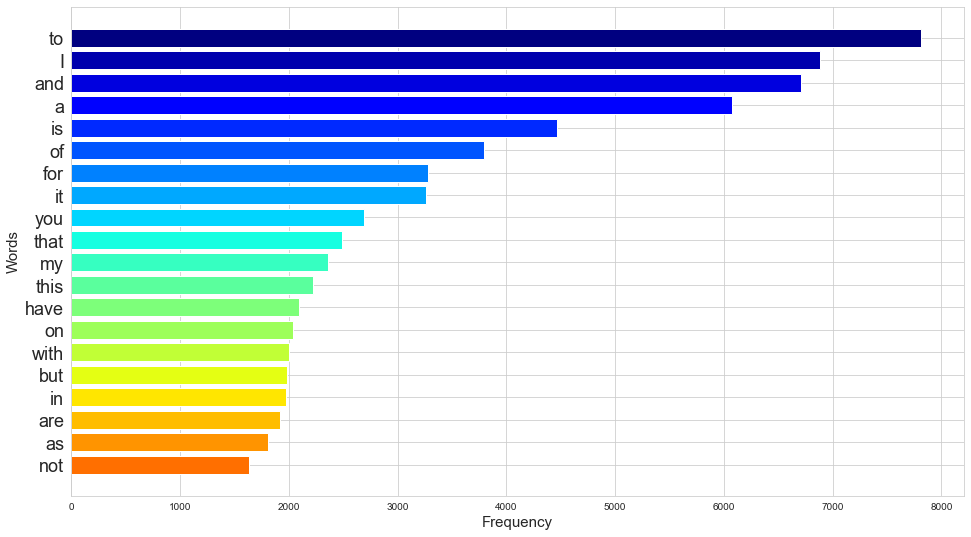

In [79]:
from collections import Counter

words = [x.split() for x in data.cleaned_text.values]
from itertools import chain
cx = Counter(list(chain(*words)))
top = 20
most_common = cx.most_common()[1:]
x, y = zip(*most_common[:top])
fig, ax = plt.subplots(1, figsize=(16,9))
ax.barh(range(len(x)), y, color = plt.cm.jet(np.linspace(0, 1, 25)))
ax.invert_yaxis()
ax.set_xlabel('Frequency', fontsize=15)
ax.set_ylabel('Words' , fontsize=15)
ax.set_yticks(np.arange(len(x)))
ax.set_yticklabels(x, fontsize=18)
plt.show()

In [81]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Collecting wordcloud



You should consider upgrading via the 'C:\Users\khan1\anaconda3\python.exe -m pip install --upgrade pip' command.


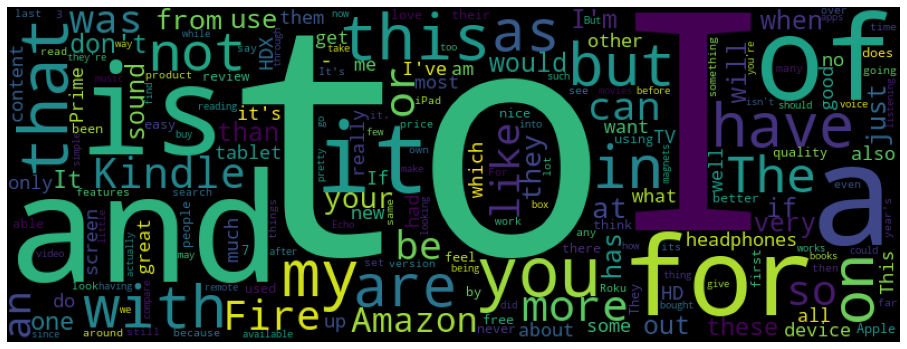

In [82]:

from wordcloud import WordCloud

d = {}
for k,v in most_common[:]:
    d[k] = int(v)

wc = WordCloud(relative_scaling=.5, width=800, height=300, background_color='black',stopwords=gensim.parsing.preprocessing.STOPWORDS).generate_from_frequencies(d)
fig = plt.figure(1,figsize=(16,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [83]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures, TrigramCollocationFinder, TrigramAssocMeasures

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(list(chain(*words)), 2)


for bigram in finder.nbest(bigram_measures.likelihood_ratio, 20):
    print(bigram)

bgs2 = nltk.bigrams(list(chain(*words))) 
fdist2 = nltk.FreqDist(bgs2)
rslt2 = pd.DataFrame(Counter(fdist2).most_common(20),columns=['Word', 'Frequency']).set_index('Word')
print('=' * 60)
print(rslt2)
print('=' * 60)

('Kindle', 'Fire')
('if', 'you')
('I', 'am')
('I', 'have')
('of', 'the')
('you', 'can')
('able', 'to')
('last', "year's")
('Fire', 'TV')
('I', 'would')
('Fire', 'HD')
('If', 'you')
('better', 'than')
('a', 'lot')
("Apple's", 'buds')
('want', 'to')
('they', 'are')
('easy', 'to')
("I'm", 'not')
("they're", 'going')
                Frequency
Word                     
(of, the)            1067
(I, have)             672
(to, the)             599
(with, the)           571
(on, the)             568
(in, the)             560
(and, the)            552
(for, the)            518
(is, a)               499
(you, can)            407
(Kindle, Fire)        397
(I, am)               395
(is, the)             393
(if, you)             385
(I, would)            379
(the, Kindle)         356
(and, I)              351
(it, is)              342
(to, be)              337
(able, to)            327


In [84]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder_ = TrigramCollocationFinder.from_words(list(chain(*words)), 3)


for trigram in finder_.nbest(trigram_measures.likelihood_ratio, 20):
    print(trigram)
    
bgs3 = nltk.trigrams(list(chain(*words))) 
fdist3 = nltk.FreqDist(bgs3)
rslt3 = pd.DataFrame(Counter(fdist3).most_common(20),columns=['Word', 'Frequency']).set_index('Word')
print('=' * 60)
print(rslt3)
print('=' * 60)

('if', 'you', 'can')
('Kindle', 'Fire', 'HD')
('If', 'you', 'can')
('Kindle', 'Fire', 'HDX')
('the', 'Kindle', 'Fire')
('lot', 'of', 'the')
('if', 'you', 'want')
('if', 'you', 'have')
('of', 'the', 'same')
('Kindle', 'Fire', 'HD,')
('able', 'to', 'be')
('point,', 'I', 'have')
('a', 'lot', 'of')
('able', 'to', 'use')
('Fire6)', 'Kindle', 'Fire')
('HD7)', 'Kindle', 'Fire')
('Kindle', 'Fire', 'HD7)')
('out', 'of', 'the')
("year's", 'Kindle', 'Fire')
('of', 'the', 'Kindle')
                        Frequency
Word                             
(the, Kindle, Fire)           183
(a, lot, of)                  181
(Kindle, Fire, HD)            143
(like, they're, going)        118
(they're, going, to)          118
(compare, them, to)           102
(I, would, say)                97
(be, able, to)                 95
(would, say, they're)          90
(this, point,, I)              89
(point,, I, have)              89
(is, a, great)                 88
(compared, to, the)            88
(I, really, lik

In [86]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\khan1\anaconda3\python.exe -m pip install --upgrade pip' command.


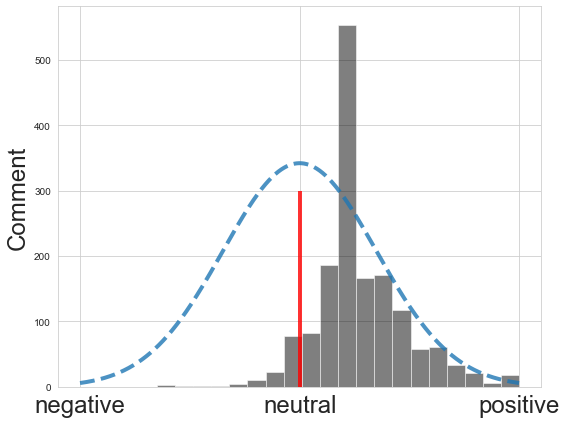

In [87]:
# Sentiment analysis - version 1 with TextBlob

import matplotlib.pyplot as plt 
from textblob import TextBlob


def TextBlob_sentimental(data):
    return TextBlob(data).sentiment.polarity



data['polarity_textblob'] = data.cleaned_text.apply(lambda x: TextBlob_sentimental(''.join(x)))
hist, edges = np.histogram(data.polarity_textblob.values, bins=np.arange(-2, 2, 0.1))

from scipy.stats import norm
fig, ax = plt.subplots(figsize=(8, 6))
data.polarity_textblob.hist(ax=ax, bins=20, color='k', alpha=0.5)
ax.set_xticks(range(-1, 2))
ax.set_xticklabels(['negative', 'neutral', 'positive'], fontsize=24)
ax.set_ylabel('Comment', fontsize=24)
x = np.arange(-1, 1, 0.001)
ax.plot(x, norm.pdf(x, 0, 0.35) * 300, '--', linewidth=4, alpha=0.8)
ax.vlines(0, 0, 300, color='r', linewidth=4, linestyle='-', alpha=0.8)
plt.tight_layout()
plt.show()

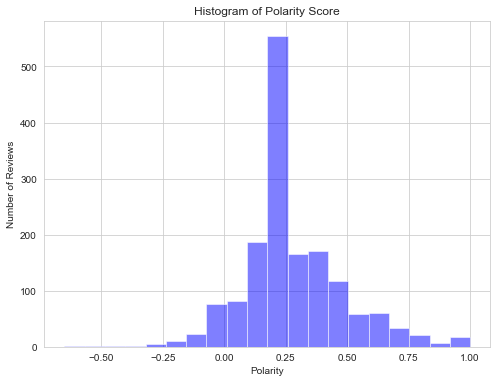

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 20
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(data.polarity_textblob, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

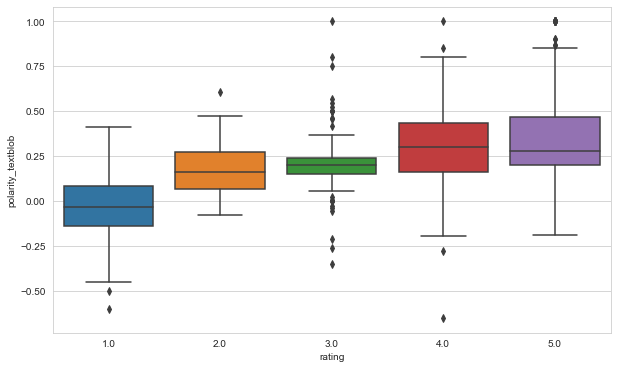

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(x='rating', y='polarity_textblob', data=data)
plt.show();

In [90]:
def TextBlob_sentimental_score(data):
    '''
    Utility function to classify the polarity of a data
    using textblob.
    '''
    score = TextBlob(data).sentiment.polarity
    if score > 0:
        return 1
    else:
        return 0

In [91]:
data['textblob_score'] = data['cleaned_text'].apply(lambda x: TextBlob_sentimental_score(x))

In [94]:
pos_textblob = data.loc[data['textblob_score'] == 1]
neg_textblob = data.loc[data['textblob_score'] == 0]

In [95]:
print("Positive reviews: ", len(pos_textblob))
print("Negative reviews: ", len(neg_textblob))

Positive reviews:  1479
Negative reviews:  118
